In [0]:
import numpy as np 

In [3]:
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

torch-0.4.1-{platform}-linux_x86_64.whl is not a valid wheel filename.


In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import matplotlib.pyplot as plt

In [8]:
!pip install helper


In [0]:
import helper

In [0]:
from torchvision import datasets, transforms

In [11]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


You'll notice I created the trainloader with a batch size of 64, and shuffle=True. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. And shuffle=True tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

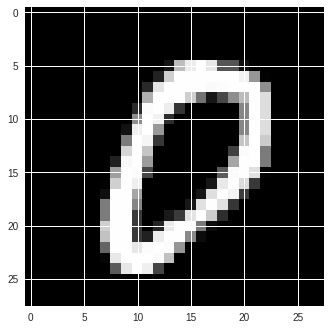

In [13]:

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
def activation(x):
  return(1/1+torch.exp(-x))

Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [0]:
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

Here we see that the probability for each class is roughly the same. This is representing an untrained network, it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.

To calculate this probability distribution, we often use the softmax function. 

In [20]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan])



Building networks with PyTorch

PyTorch provides a module nn that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [23]:

# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

You can define the network somewhat more concisely and clearly using the torch.nn.functional module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as F, import torch.nn.functional as F.

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x


Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [29]:
class Netwrok(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.hidden = nn.Linear(784,128)
    self.hidden1 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
    
  def forward(self,x):
    
    x= F.relu(self.hidden(x))
    x= F.relu(self.hidden1(x))
    x= F.softmax(self.output(x),dim=1)
    
    return x
  
  
  
model= Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [30]:
print(model.hidden.weight)
print(model.hidden.bias)


Parameter containing:
tensor([[-0.0119, -0.0108, -0.0121,  ...,  0.0009,  0.0328, -0.0144],
        [-0.0186,  0.0295, -0.0208,  ...,  0.0056,  0.0122,  0.0105],
        [-0.0031, -0.0218, -0.0064,  ...,  0.0284, -0.0195,  0.0020],
        ...,
        [-0.0062,  0.0156,  0.0110,  ...,  0.0208, -0.0183, -0.0163],
        [-0.0029, -0.0265, -0.0174,  ...,  0.0345, -0.0151, -0.0355],
        [-0.0165,  0.0252,  0.0006,  ...,  0.0250, -0.0231, -0.0332]],
       requires_grad=True)
Parameter containing:
tensor([-0.0101,  0.0203,  0.0105, -0.0251, -0.0106,  0.0257,  0.0188,  0.0200,
         0.0129, -0.0046, -0.0058,  0.0087,  0.0143, -0.0094,  0.0275, -0.0273,
         0.0089, -0.0182,  0.0065, -0.0307, -0.0025,  0.0115,  0.0069, -0.0341,
         0.0002,  0.0162,  0.0139,  0.0204,  0.0179, -0.0298, -0.0084,  0.0218,
         0.0164, -0.0040, -0.0238, -0.0107, -0.0257,  0.0200, -0.0295, -0.0060,
        -0.0229, -0.0167,  0.0242,  0.0127, -0.0100,  0.0263,  0.0063, -0.0062,
         0.0098

Forward Pass

In [41]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


AttributeError: ignored

In [0]:
import helper 


In [38]:
helper.version

'2.4.2'

In [40]:
!pip install helper --upgrade

Requirement already up-to-date: helper in /usr/local/lib/python3.6/dist-packages (2.4.2)


In [42]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


AttributeError: ignored